# Dimensionality Reduction Assignment – MNIST

This notebook answers **Questions 9 and 10** of the Dimensionality Reduction assignment:

- Train classifiers (RandomForest and SGDClassifier) on the full MNIST dataset and on a PCA-reduced version (95% explained variance), then compare training time and accuracy.
- Use t-SNE (and optionally other methods) to visualize the MNIST digits in 2D.


In [1]:

import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from sklearn.metrics import accuracy_score


## 1. Load the MNIST dataset

In [2]:

# This may take a little while the first time because it downloads MNIST from OpenML.
mnist = fetch_openml('mnist_784', as_frame=False)
X = mnist.data.astype(np.float32)
y = mnist.target.astype(np.int64)

# As requested: first 60,000 for training, last 10,000 for testing
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (60000, 784)
Test shape: (10000, 784)


## 2. Random Forest on the original 784-dimensional data

In [3]:

rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

start_time = time.time()
rf_clf.fit(X_train, y_train)
rf_train_time = time.time() - start_time

y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"RandomForest (original data) - training time: {rf_train_time:.2f} seconds")
print(f"RandomForest (original data) - test accuracy: {rf_accuracy:.4f}")


RandomForest (original data) - training time: 42.46 seconds
RandomForest (original data) - test accuracy: 0.9705


## 3. Apply PCA (95% explained variance) and retrain Random Forest

In [4]:

pca = PCA(n_components=0.95, random_state=42)

start_time = time.time()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca_time = time.time() - start_time

print("Original dimensionality:", X_train.shape[1])
print("Reduced dimensionality (95% variance):", X_train_pca.shape[1])
print(f"PCA fit+transform time: {pca_time:.2f} seconds")


rf_pca_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

start_time = time.time()
rf_pca_clf.fit(X_train_pca, y_train)
rf_pca_train_time = time.time() - start_time

y_pred_rf_pca = rf_pca_clf.predict(X_test_pca)
rf_pca_accuracy = accuracy_score(y_test, y_pred_rf_pca)

print(f"RandomForest (PCA data) - training time: {rf_pca_train_time:.2f} seconds")
print(f"RandomForest (PCA data) - test accuracy: {rf_pca_accuracy:.4f}")


Original dimensionality: 784
Reduced dimensionality (95% variance): 154
PCA fit+transform time: 1.13 seconds
RandomForest (PCA data) - training time: 136.68 seconds
RandomForest (PCA data) - test accuracy: 0.9496


## 4. SGDClassifier on original data

In [5]:

sgd_clf = SGDClassifier(random_state=42, n_jobs=-1)

start_time = time.time()
sgd_clf.fit(X_train, y_train)
sgd_train_time = time.time() - start_time

y_pred_sgd = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test, y_pred_sgd)

print(f"SGDClassifier (original data) - training time: {sgd_train_time:.2f} seconds")
print(f"SGDClassifier (original data) - test accuracy: {sgd_accuracy:.4f}")


SGDClassifier (original data) - training time: 123.28 seconds
SGDClassifier (original data) - test accuracy: 0.8847


## 5. SGDClassifier on PCA-reduced data

In [6]:

sgd_pca_clf = SGDClassifier(random_state=42, n_jobs=-1)

start_time = time.time()
sgd_pca_clf.fit(X_train_pca, y_train)
sgd_pca_train_time = time.time() - start_time

y_pred_sgd_pca = sgd_pca_clf.predict(X_test_pca)
sgd_pca_accuracy = accuracy_score(y_test, y_pred_sgd_pca)

print(f"SGDClassifier (PCA data) - training time: {sgd_pca_train_time:.2f} seconds")
print(f"SGDClassifier (PCA data) - test accuracy: {sgd_pca_accuracy:.4f}")


SGDClassifier (PCA data) - training time: 31.81 seconds
SGDClassifier (PCA data) - test accuracy: 0.8817


### Summary (for your report)
- Compare training times: RandomForest/SGD with and without PCA.
- Comment on whether PCA significantly speeds up training.
- Comment on how much accuracy is lost (if at all).


## 6. t-SNE visualization of the first 5,000 MNIST images (Question 10)

In [7]:

# Use only the first 5,000 instances for t-SNE (for speed)
n_samples = 5000
X_small = X_train[:n_samples]
y_small = y_train[:n_samples]

# Optionally apply PCA first to speed up t-SNE
pca_tsne = PCA(n_components=50, random_state=42)
X_small_pca = pca_tsne.fit_transform(X_small)

tsne = TSNE(n_components=2, random_state=42, init="pca", learning_rate="auto", perplexity=30)
X_tsne = tsne.fit_transform(X_small_pca)

print("t-SNE result shape:", X_tsne.shape)


t-SNE result shape: (5000, 2)


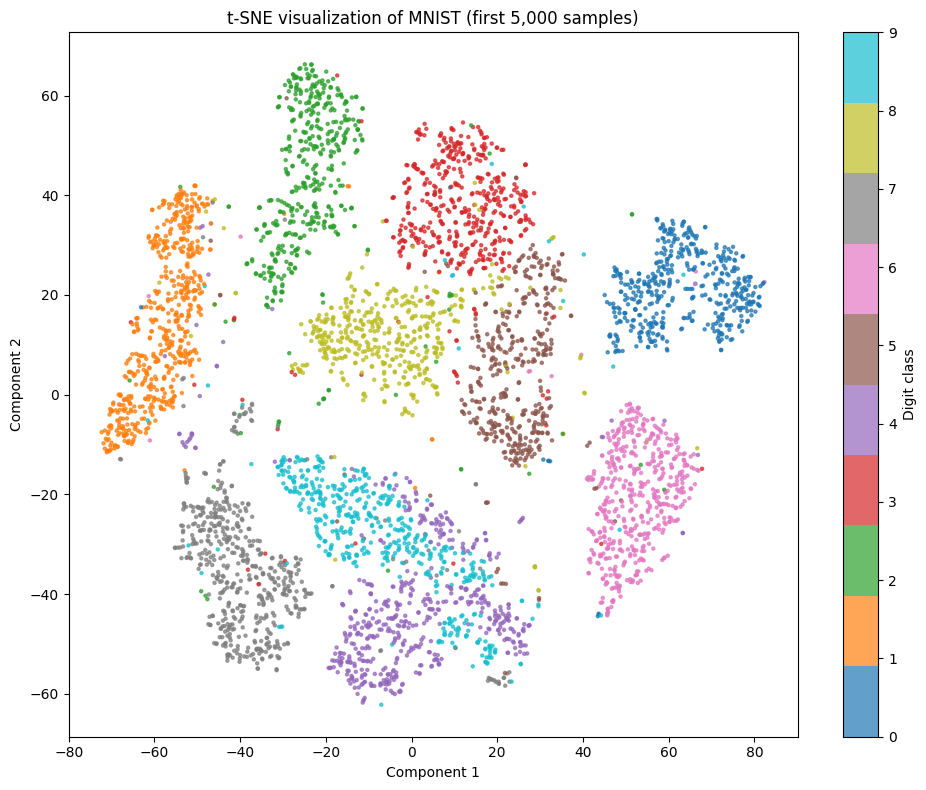

In [8]:

# Scatter plot colored by digit class
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_small, cmap="tab10", s=5, alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label="Digit class")
plt.title("t-SNE visualization of MNIST (first 5,000 samples)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.tight_layout()
plt.show()


## 7. Optional: Compare with PCA, LLE, and MDS for visualization

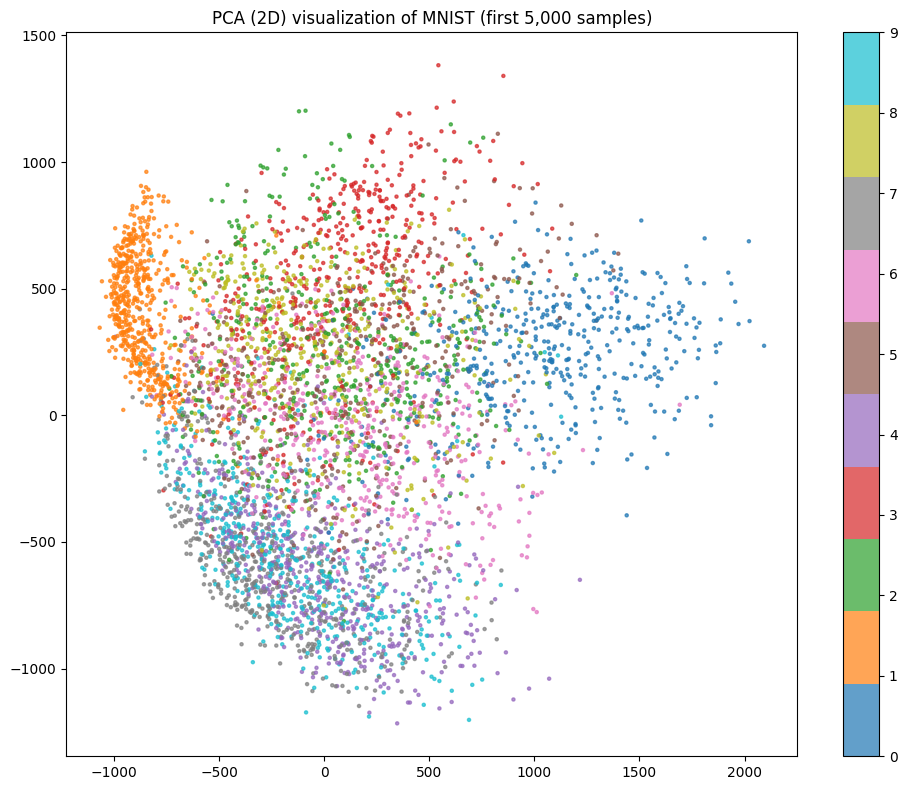

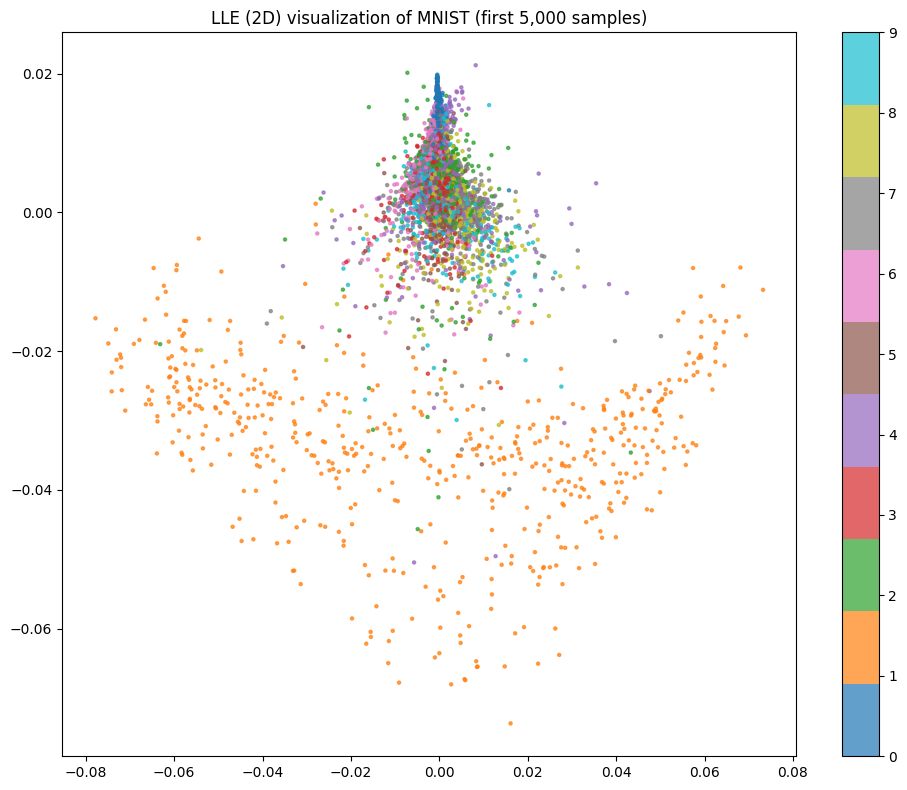

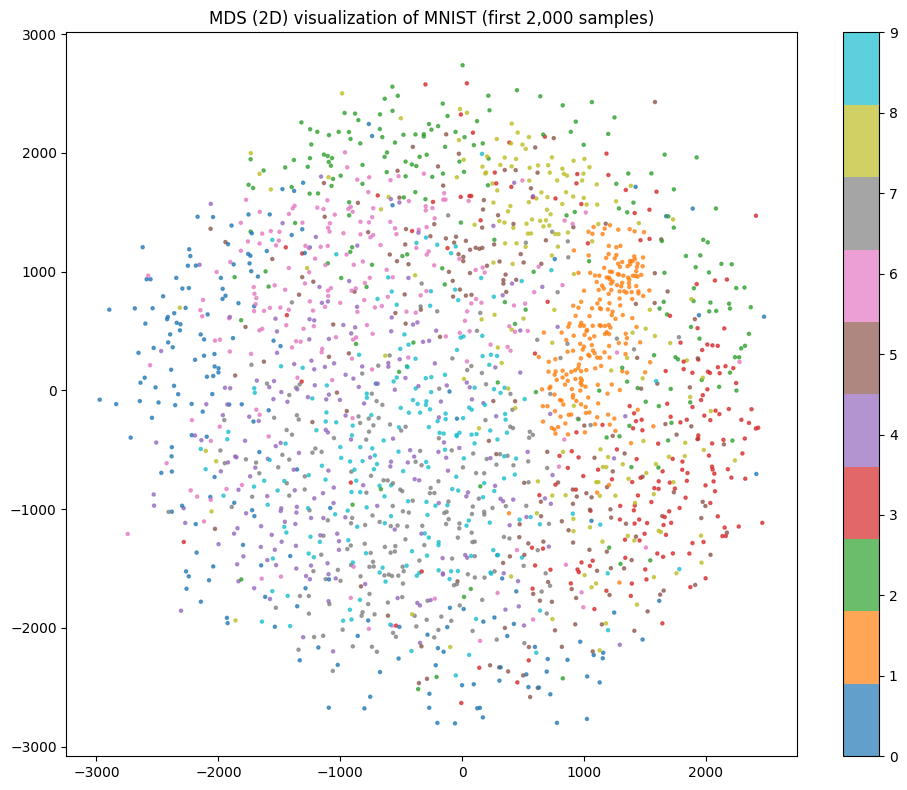

In [9]:

# PCA to 2D
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_small)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_small, cmap="tab10", s=5, alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.title("PCA (2D) visualization of MNIST (first 5,000 samples)")
plt.tight_layout()
plt.show()


# Locally Linear Embedding (LLE) – can be slower, so you can reduce n_samples if needed
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=30, random_state=42)
X_lle = lle.fit_transform(X_small)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_small, cmap="tab10", s=5, alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.title("LLE (2D) visualization of MNIST (first 5,000 samples)")
plt.tight_layout()
plt.show()


# MDS – also relatively slow, so use fewer samples if it's too slow
n_samples_mds = 2000
X_mds_input = X_small[:n_samples_mds]
y_mds = y_small[:n_samples_mds]

mds = MDS(n_components=2, random_state=42, n_init=1, max_iter=300)
X_mds = mds.fit_transform(X_mds_input)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_mds, cmap="tab10", s=5, alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.title("MDS (2D) visualization of MNIST (first 2,000 samples)")
plt.tight_layout()
plt.show()
